In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
class ShortcutGridworld():
    
    def __init__(self):
        self._size = [9,6]
        self._start = [3,0]
        self._end = [8,5]
        self._forbidden_states = [[i,2] for i in range(1,9)]
        self.reset()
        
    def reset(self):
        self._current_position = self._start
        return self._current_position
        
    def create_shortcut(self):
        self._forbidden_states.remove([8,2])
        
    def move(self, move):
        new_position = self._calc_new_position(move)
        new_position = self._cap_new_position(new_position)
        self._current_position = new_position
        is_over = self._is_game_over(new_position)
        if is_over:
            reward = 1
        else:
            reward = 0
        return reward, new_position, is_over
    
    def _is_game_over(self, position):
        return (position == self._end).all()
        
    def _calc_new_position(self, move):
        new_position = self._current_position + np.array(move)
        if list(new_position) in self._forbidden_states:
            new_position = self._current_position
        return new_position
        
    def _cap_new_position(self, new_position):
        new_position[0] = min(new_position[0], self._size[0]-1)
        new_position[0] = max(new_position[0], 0)
        new_position[1] = min(new_position[1], self._size[1]-1)
        new_position[1] = max(new_position[1], 0)
        return new_position

In [20]:
def choose_action(q, state, eps):
    if np.random.rand() < eps:
        return np.random.randint(4)
    else:
        return np.argmax(q[state[0], state[1],:])
    
def parse_action(action):
    parsed_actions_simple = [[0,1], [1,0], [0,-1],[-1,0]]
    return parsed_actions_simple[action]

In [30]:
model = np.zeros((9,6,4))
q = np.zeros((9,6,4))
cum_reward = [0]
timestep = 0
last_state_actions = []
env = ShortcutGridworld()
n = 10

for i in range(1000):
    if timestep == 20000:
        env.create_shortcut()
    state = env.reset()
    done = False
    gamma = 0.9
    alpha = 0.5
    eps = 0.1
    while not done:
        action = choose_action(q, state, eps)
        r, next_state, done = env.move(parse_action(action))
        q[state[0], state[1], action] += alpha * (r + gamma * np.max(q[next_state[0], next_state[1], :]) \
                                                  - q[state[0], state[1], action])
        model[state[0],state[1],action] = (next_state[0],next_state[1],r)
        last_state_actions.append((state[0], state[1], action))
        state = next_state
        cum_reward.append(cum_reward[-1]+r) 
        timestep += 1
        for j in range(n):
            idx = np.random.randint(len(last_state_actions))
            sim_state = [last_state_actions[idx][0], last_state_actions[idx][1]]
            sim_action = last_state_actions[idx][2]
            next_state = [model[sim_state[0], sim_state[1], sim_action][0], model[sim_state[0], sim_state[1], sim_action][1]]
            r = model[sim_state[0], sim_state[1], sim_action][2]
            q[sim_state[0], sim_state[1], sim_action] += alpha * (r + gamma * np.max(q[next_state[0], next_state[1], :]) \
                                                  - q[state[0], state[1], action])
            

ValueError: setting an array element with a sequence.

In [ ]:
class QLearning():
    
    def __init__(self, alpha, gamma, epsilon):
        self._alpha = alpha
        self._gamma = gamma
        self._epsilon = epsilon
        self._q = np.zeros(0)
        
    def choose_action(q, state):
        if np.random.rand() < self._epsilon:
            return np.random.randint(4)
        else:
            return np.argmax(q[state[0], state[1],:])
        
    def train(self, n_episodes):
        env = ShortcutGridworld()
        for _ in range(n_episodes):
            self._train_one_episode(env)
    
    def train_one_episode(self, env):
        state = env.reset()
        done = False
        while not done:
            action = choose_action(q, state)
            r, next_state, done = env.move(parse_action(action))
            self._update_q_function(state, action, reward, next_state)
            state = next_state
    
    def _update_q_function(self, state, action, reward, next_state)
        self._q[state[0], state[1], action] += self._alpha * (reward + self._gamma * np.max(self._q[next_state[0],\
                                                next_state[1], :]) - self._q[state[0], state[1], action])

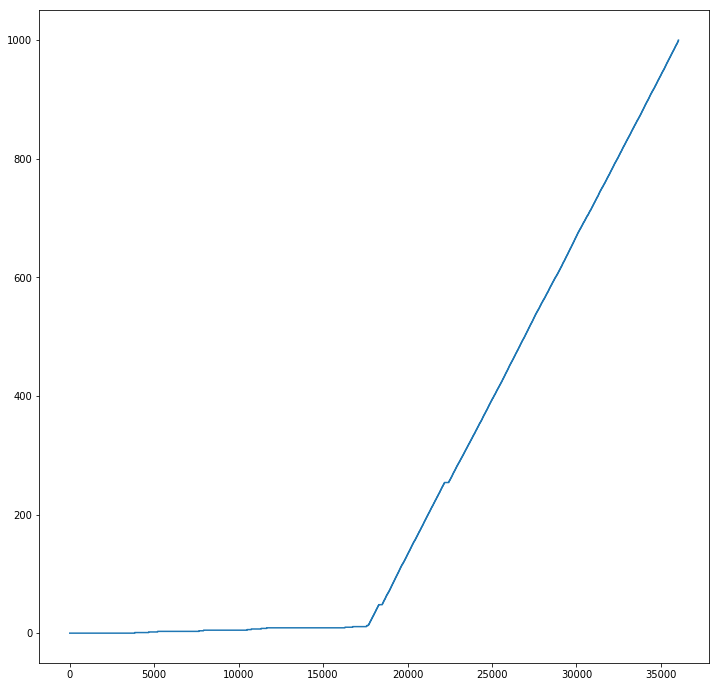

In [29]:
fig = plt.figure(figsize=(12,12))
plt.plot(range(len(cum_reward)), cum_reward)